In [1]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import mrmr
from mrmr import mrmr_classif




df=pd.read_csv("weatherHistory.csv")

df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [37]:
# drop irrelevant columns

to_drop = ['Formatted Date','Summary','Loud Cover','Daily Summary','Precip Type']
df.drop(to_drop, inplace=True, axis=1)

# Cleaning data
df.replace(0, np.nan, inplace=True)

# Drop null rows
df = df.dropna()

df

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [38]:
# standardize the df

standardized_df = (df - df.mean()) / df.std()

# separate dependant and independant variables

X = df.drop(columns=['Visibility (km)'])
y = df['Visibility (km)']





In [39]:

# split into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



                                 OLS Regression Results                                
Dep. Variable:        Visibility (km)   R-squared (uncentered):                   0.186
Model:                            OLS   Adj. R-squared (uncentered):              0.186
Method:                 Least Squares   F-statistic:                              2816.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):                        0.00
Time:                        16:48:00   Log-Likelihood:                         -97238.
No. Observations:               73871   AIC:                                  1.945e+05
Df Residuals:                   73865   BIC:                                  1.945e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

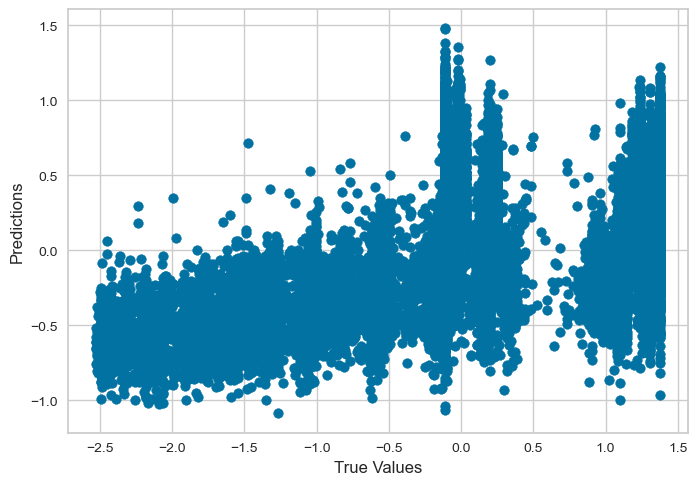

In [40]:
#run Linear Regression

C = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train.astype(float)).fit()
predictions = model.predict(X_test) 

print_model = model.summary()
print(print_model)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions') 

mse_score = mean_squared_error(y_test, predictions)
print("MSE Score:", mse_score)


In [41]:
#checking for the lowest significant feature
selected_features = mrmr_classif(X=X, y=y, K=6)

print(selected_features)

100%|██████████| 6/6 [00:05<00:00,  1.07it/s]

['Humidity', 'Pressure (millibars)', 'Temperature (C)', 'Apparent Temperature (C)', 'Wind Bearing (degrees)', 'Wind Speed (km/h)']


In [42]:

#droping lowest significant column ie 'Wind Speed (km/h)'

X = X.drop(columns=['Wind Speed (km/h)'])
print(X)


       Temperature (C)  Apparent Temperature (C)  Humidity  \
0            -0.268731                 -0.334379  0.802369   
1            -0.280956                 -0.349452  0.649099   
2            -0.278627                 -0.148305  0.802369   
3            -0.392726                 -0.469517  0.495829   
4            -0.343827                 -0.372842  0.495829   
...                ...                       ...       ...   
96448         1.464879                  1.408380 -1.547772   
96449         1.314687                  1.274281 -1.292322   
96450         1.048067                  1.036231 -0.883602   
96451         0.993929                  0.987893 -0.679242   
96452         0.880411                  0.886540 -0.628152   

       Wind Bearing (degrees)  Pressure (millibars)  
0                    0.565625             -0.204632  
1                    0.642102             -0.140268  
2                    0.116320             -0.100362  
3                    0.737699          

                                 OLS Regression Results                                
Dep. Variable:        Visibility (km)   R-squared (uncentered):                   0.185
Model:                            OLS   Adj. R-squared (uncentered):              0.185
Method:                 Least Squares   F-statistic:                              3357.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):                        0.00
Time:                        16:48:10   Log-Likelihood:                         -97283.
No. Observations:               73871   AIC:                                  1.946e+05
Df Residuals:                   73866   BIC:                                  1.946e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

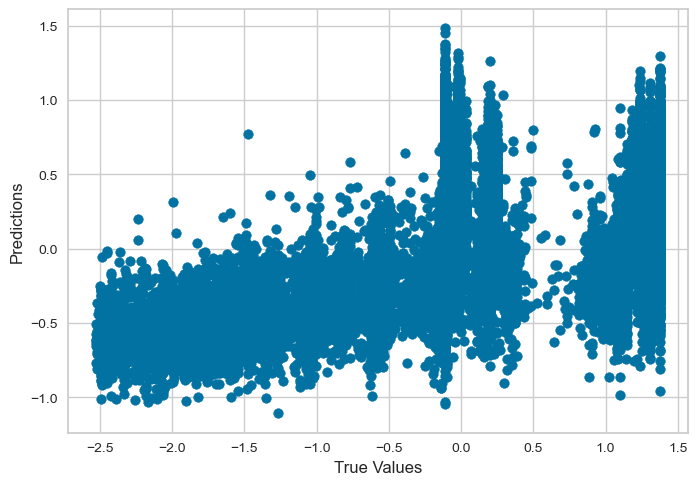

In [43]:
# split into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#run Linear Regression

C = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train.astype(float)).fit()
predictions = model.predict(X_test) 

print_model = model.summary()
print(print_model)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions') 

mse_score = mean_squared_error(y_test, predictions)
print("MSE Score:", mse_score)

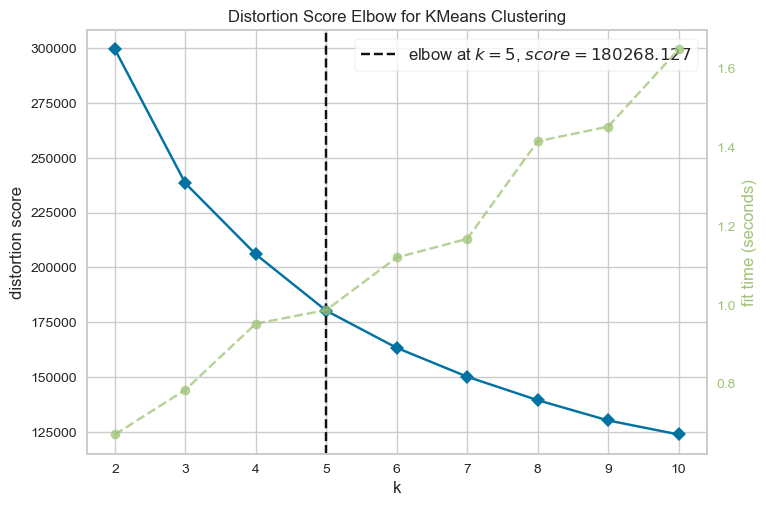

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
model = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X)    
elb_visualizer.show()  

In [45]:
# cluster visualisation for 4 clusters

model_4clust = KMeans(n_clusters = 4, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X)    
sil_visualizer.show()


In [46]:
# cluster visualisation for 5 clusters

model_4clust = KMeans(n_clusters = 5, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X)    
sil_visualizer.show()

In [47]:
# cluster visualisation for 6 clusters

model_4clust = KMeans(n_clusters = 6, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X)    
sil_visualizer.show()

In [48]:
#scatter plotting the 5 clusters


# Select the columns for clustering
columns_for_clustering = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

# Create a new DataFrame for clustering
df_cluster = df[columns_for_clustering].copy()

# Standardize the data
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Perform clustering using K-means
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(df_cluster_scaled)

# Assign cluster labels to the DataFrame
df_cluster['Cluster'] = kmeans.labels_

# View the resulting DataFrame with cluster labels
df_cluster

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Cluster
0,-0.268731,-0.334379,0.802369,0.468307,0.565625,1.307414,-0.204632,1
1,-0.280956,-0.349452,0.649099,0.489543,0.642102,1.307414,-0.140268,1
2,-0.278627,-0.148305,0.802369,-1.025319,0.116320,1.096582,-0.100362,1
3,-0.392726,-0.469517,0.495829,0.465947,0.737699,1.307414,-0.039861,1
4,-0.343827,-0.372842,0.495829,0.017623,0.642102,1.307414,-0.026988,1
...,...,...,...,...,...,...,...,...
96448,1.464879,1.408380,-1.547772,0.010545,-1.537505,1.373787,-0.303751,0
96449,1.314687,1.274281,-1.292322,-0.121593,-1.642662,1.241041,-0.200770,0
96450,1.048067,1.036231,-0.883602,-0.284405,-1.547065,1.373787,-0.136406,4
96451,0.993929,0.987893,-0.679242,-0.057884,-1.642662,1.373787,-0.099075,4


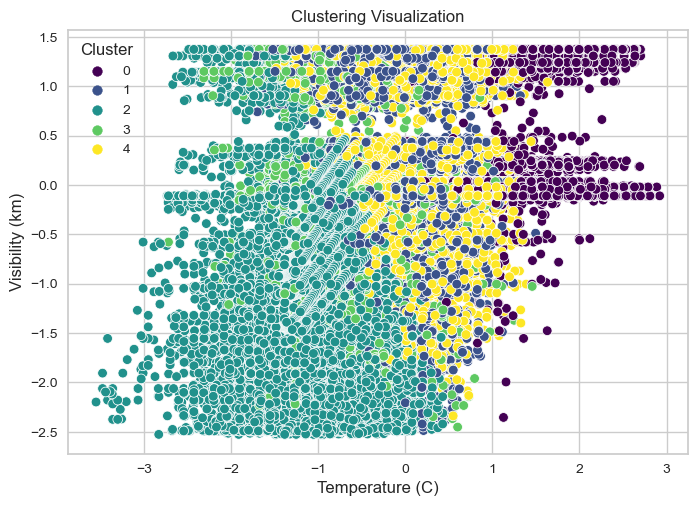

In [49]:

# Create a scatter plot
sns.scatterplot(
    x='Temperature (C)',
    y='Visibility (km)',
    hue='Cluster',
    data=df_cluster,
    palette='viridis'  # Adjust the color palette as desired
)
plt.title('Clustering Visualization')
plt.show()

In [50]:
# Create four separate dataframes based on cluster labels
df_cluster_0 = df_cluster[df_cluster['Cluster'] == 0]
df_cluster_1 = df_cluster[df_cluster['Cluster'] == 1]
df_cluster_2 = df_cluster[df_cluster['Cluster'] == 2]
df_cluster_3 = df_cluster[df_cluster['Cluster'] == 3]
df_cluster_4 = df_cluster[df_cluster['Cluster'] == 4]

# Print the first few rows of each cluster dataframe
print("Cluster 0:")
print(df_cluster_0.head())

print("\nCluster 1:")
print(df_cluster_1.head())

print("\nCluster 2:")
print(df_cluster_2.head())

print("\nCluster 3:")
print(df_cluster_3.head())

print("\nCluster 4:")
print(df_cluster_4.head())

Cluster 0:
    Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
11         0.535203                  0.578321 -0.985782           1.298885   
12         0.603895                  0.639653 -0.934692           1.615072   
13         0.554996                  0.595993 -1.139052           1.431023   
14         0.716830                  0.740487 -1.343412           0.652355   
15         0.720323                  0.743605 -1.394502          -0.076761   

    Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  Cluster  
11                1.187004         0.245445              0.131347        0  
12                0.852415         0.202498              0.112037        0  
13                0.928893         0.202498              0.097877        0  
14                0.670781         0.245445              0.057972        0  
15                0.919333         0.202498             -0.032137        0  

Cluster 1:
   Temperature (C)  Apparent Temperature (C)  

                                 OLS Regression Results                                
Dep. Variable:        Visibility (km)   R-squared (uncentered):                   0.206
Model:                            OLS   Adj. R-squared (uncentered):              0.206
Method:                 Least Squares   F-statistic:                              656.0
Date:                Mon, 26 Jun 2023   Prob (F-statistic):                        0.00
Time:                        16:48:26   Log-Likelihood:                         -13559.
No. Observations:               15172   AIC:                                  2.713e+04
Df Residuals:                   15166   BIC:                                  2.718e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

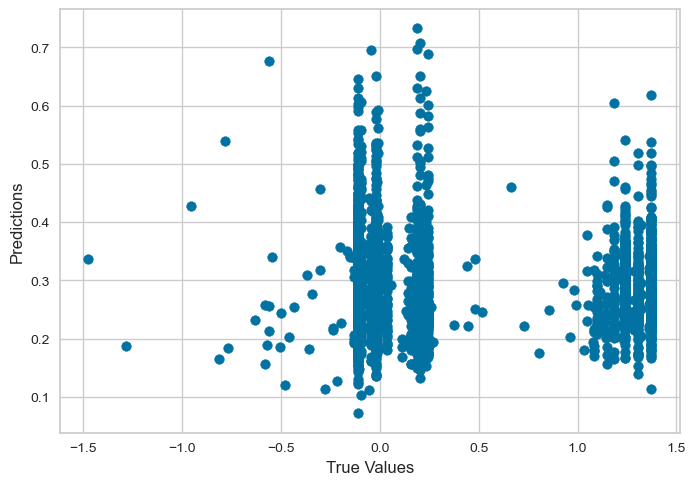

In [51]:
# regression for cluster1

df_cluster_0 = df_cluster_0.drop(columns=['Cluster'])

X = df_cluster_0.drop(columns=['Visibility (km)'])
y = df_cluster_0['Visibility (km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#run Linear Regression

C = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train.astype(float)).fit()
predictions = model.predict(X_test) 

print_model = model.summary()
print(print_model)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions') 

mse_score = mean_squared_error(y_test, predictions)
print("MSE Score:", mse_score)


                                 OLS Regression Results                                
Dep. Variable:        Visibility (km)   R-squared (uncentered):                   0.232
Model:                            OLS   Adj. R-squared (uncentered):              0.232
Method:                 Least Squares   F-statistic:                              763.7
Date:                Mon, 26 Jun 2023   Prob (F-statistic):                        0.00
Time:                        16:48:26   Log-Likelihood:                         -18086.
No. Observations:               15156   AIC:                                  3.618e+04
Df Residuals:                   15150   BIC:                                  3.623e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

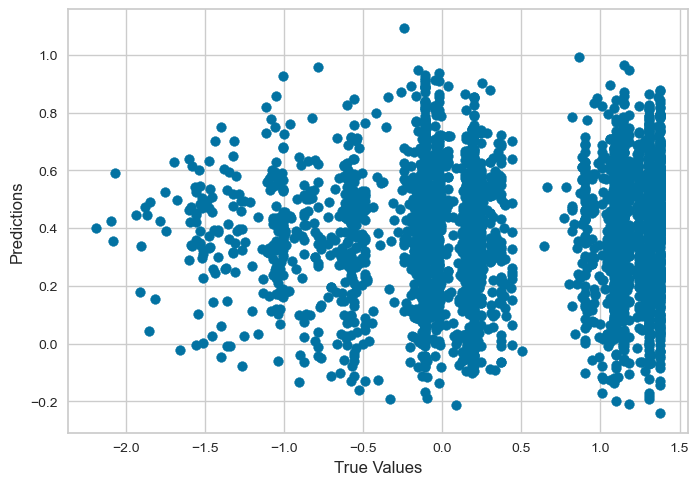

In [52]:
# regression for cluster2

df_cluster_1 = df_cluster_1.drop(columns=['Cluster'])

X = df_cluster_1.drop(columns=['Visibility (km)'])
y = df_cluster_1['Visibility (km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#run Linear Regression

C = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train.astype(float)).fit()
predictions = model.predict(X_test) 

print_model = model.summary()
print(print_model)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions') 

mse_score = mean_squared_error(y_test, predictions)
print("MSE Score:", mse_score)


                                 OLS Regression Results                                
Dep. Variable:        Visibility (km)   R-squared (uncentered):                   0.760
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              9097.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):                        0.00
Time:                        16:48:26   Log-Likelihood:                         -18529.
No. Observations:               17232   AIC:                                  3.707e+04
Df Residuals:                   17226   BIC:                                  3.712e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

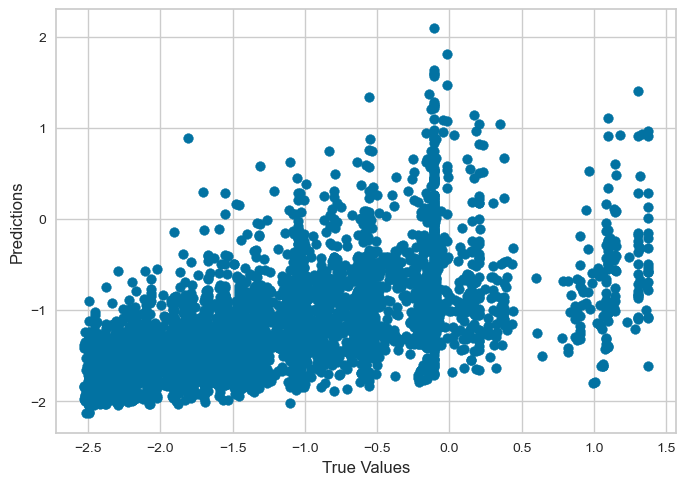

In [53]:
# regression for cluster3

df_cluster_2 = df_cluster_2.drop(columns=['Cluster'])

X = df_cluster_2.drop(columns=['Visibility (km)'])
y = df_cluster_2['Visibility (km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#run Linear Regression

C = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train.astype(float)).fit()
predictions = model.predict(X_test) 

print_model = model.summary()
print(print_model)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions') 

mse_score = mean_squared_error(y_test, predictions)
print("MSE Score:", mse_score)


                                 OLS Regression Results                                
Dep. Variable:        Visibility (km)   R-squared (uncentered):                   0.119
Model:                            OLS   Adj. R-squared (uncentered):              0.118
Method:                 Least Squares   F-statistic:                              240.4
Date:                Mon, 26 Jun 2023   Prob (F-statistic):                   2.55e-289
Time:                        16:48:26   Log-Likelihood:                         -12127.
No. Observations:               10736   AIC:                                  2.427e+04
Df Residuals:                   10730   BIC:                                  2.431e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

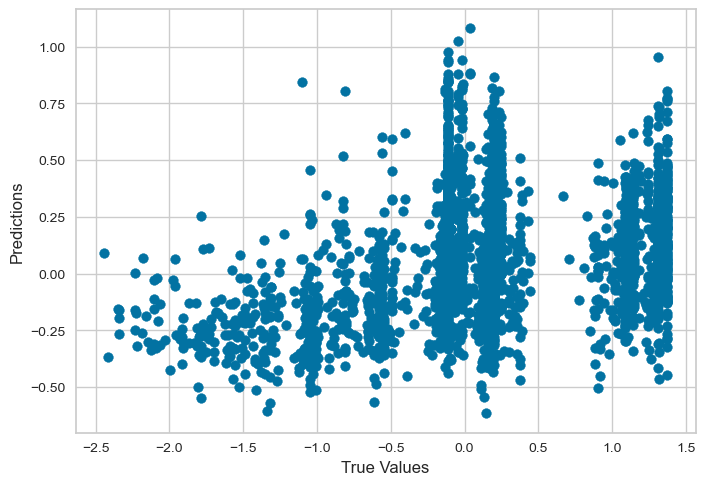

In [54]:
# regression for cluster4

df_cluster_3 = df_cluster_3.drop(columns=['Cluster'])

X = df_cluster_3.drop(columns=['Visibility (km)'])
y = df_cluster_3['Visibility (km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#run Linear Regression

C = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train.astype(float)).fit()
predictions = model.predict(X_test) 

print_model = model.summary()
print(print_model)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions') 

mse_score = mean_squared_error(y_test, predictions)
print("MSE Score:", mse_score)


                                 OLS Regression Results                                
Dep. Variable:        Visibility (km)   R-squared (uncentered):                   0.185
Model:                            OLS   Adj. R-squared (uncentered):              0.184
Method:                 Least Squares   F-statistic:                              587.6
Date:                Mon, 26 Jun 2023   Prob (F-statistic):                        0.00
Time:                        16:48:26   Log-Likelihood:                         -18410.
No. Observations:               15575   AIC:                                  3.683e+04
Df Residuals:                   15569   BIC:                                  3.688e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

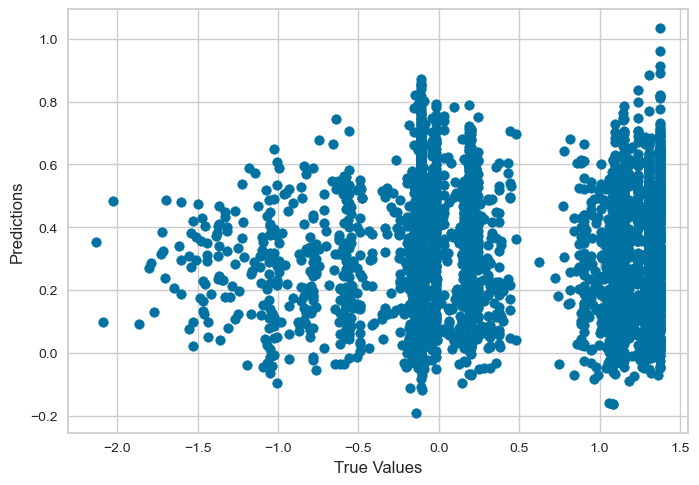

In [55]:
# regression for cluster5

df_cluster_4 = df_cluster_4.drop(columns=['Cluster'])

X = df_cluster_4.drop(columns=['Visibility (km)'])
y = df_cluster_4['Visibility (km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#run Linear Regression

C = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train.astype(float)).fit()
predictions = model.predict(X_test) 

print_model = model.summary()
print(print_model)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions') 

mse_score = mean_squared_error(y_test, predictions)
print("MSE Score:", mse_score)
